# Exploration of a single ICU sepsis data log

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '../training/'

In [3]:
# Choose patient sample
sample_num = 200

In [4]:
# Import and print dataframe layout
def loadICUdata(sample_num, path = './', printdf = False):
    samplestr = 'p' + (str(sample_num) + '.psv').rjust(9, '0')
    fname = path + samplestr
    df = pd.read_csv(fname, sep = '|')
    print(fname, ' file:')
    if printdf:
        print(df)
    return df

In [5]:
df = loadICUdata(sample_num, path, True)

../training/p00200.psv  file:
       HR  O2Sat   Temp    SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0     NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN         NaN   NaN   
1    65.0  100.0  34.90  201.0  109.0  65.5  16.0    NaN         NaN   NaN   
2    79.5  100.0  36.05  211.5  102.5  63.5  16.0    NaN         NaN   NaN   
3    84.0   99.0  37.10  183.0   95.0  61.0  19.0    NaN         NaN   NaN   
4    90.0   99.0  37.40  136.5   75.0  55.5  23.0    NaN         NaN   NaN   
5    86.5   98.0  37.90  175.5   96.0  65.0  22.5    NaN         NaN   NaN   
6    84.0    NaN  38.30  130.0   74.0  53.0  24.0    NaN         NaN   NaN   
7    80.0  100.0  38.40  171.0   93.0  62.0  22.0    NaN         NaN   NaN   
8    79.0  100.0  38.20  182.0   99.0  64.0  25.0    NaN         NaN   NaN   
9    81.0   97.0  38.60  197.0  101.0  68.0  26.0    NaN         NaN   NaN   
10   77.0   87.5  38.50  194.0  102.0  65.0  27.0    NaN         NaN   NaN   
11   70.5   91.0  38.25  247.5  12

In [6]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,1,0
1,65.0,100.0,34.90,201.0,109.0,65.5,16.0,NaN,NaN,NaN,...,11.0,187.0,149.0,57,0,0,1,-6.58,2,0
2,79.5,100.0,36.05,211.5,102.5,63.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,3,0
3,84.0,99.0,37.10,183.0,95.0,61.0,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,4,0
4,90.0,99.0,37.40,136.5,75.0,55.5,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,5,0
5,86.5,98.0,37.90,175.5,96.0,65.0,22.5,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,6,0
6,84.0,NaN,38.30,130.0,74.0,53.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,7,0
7,80.0,100.0,38.40,171.0,93.0,62.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,8,0
8,79.0,100.0,38.20,182.0,99.0,64.0,25.0,NaN,NaN,NaN,...,8.2,NaN,105.0,57,0,0,1,-6.58,9,0
9,81.0,97.0,38.60,197.0,101.0,68.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,57,0,0,1,-6.58,10,0


## Check sepsis labels for ALL patients

In [7]:
# get the sepsis label value
def get_sepsislabel(df):
    sl = df[["SepsisLabel"]]
    count = df['SepsisLabel'].value_counts()
    count_healthy = -1
    count_sep = -1
    
    if len(count) == 2:
        count_sep = count[1]
        count_healthy = count[0]
        
    elif len(count) == 1:
        if sl.values[0] == 0:
            count_healthy = count.values[0]
        elif sl.values[0] == 1:
            count_sep = count.values[0]
    return sl, count_healthy, count_sep


In [8]:
count = df['SepsisLabel'].value_counts()
count.values
len(count)
sl, ch, cs = get_sepsislabel(df)
len(sl)

14

In [9]:
# Print result
sl, ch, cs = get_sepsislabel(df) 
print('patient {:d}, {:d} {:d} {:2.2f}%'.format(sample_num, ch, cs, 100*cs/len(sl)))

patient 200, 14 -1 -7.14%


## Loop study

In [10]:
# Run in a loop and get a sepsis presence report
SL = []    #Sepsis labels
CH = []    #Healthy hours count
CS = []    #Sepsis hours count
CSCH = []  #Percentage cs/(cs+ch)
for i in range(1,5001):
    df = loadICUdata(i, path, False)
    sl, ch, cs = get_sepsislabel(df) 
    SL.append(sl)
    CH.append(ch)
    CS.append(cs)
    if cs != -1 and ch != -1:
        csch = 1.0*cs/(cs + ch)
    elif cs == -1:
        csch = 0
    elif ch == -1:
        csch = 1
    CSCH.append(csch)
    
CSCH = np.array(CSCH)

../training/p00001.psv  file:
../training/p00002.psv  file:
../training/p00003.psv  file:
../training/p00004.psv  file:
../training/p00005.psv  file:
../training/p00006.psv  file:
../training/p00007.psv  file:
../training/p00008.psv  file:
../training/p00009.psv  file:
../training/p00010.psv  file:
../training/p00011.psv  file:
../training/p00012.psv  file:
../training/p00013.psv  file:
../training/p00014.psv  file:
../training/p00015.psv  file:
../training/p00016.psv  file:
../training/p00017.psv  file:
../training/p00018.psv  file:
../training/p00019.psv  file:
../training/p00020.psv  file:
../training/p00021.psv  file:
../training/p00022.psv  file:
../training/p00023.psv  file:
../training/p00024.psv  file:
../training/p00025.psv  file:
../training/p00026.psv  file:
../training/p00027.psv  file:
../training/p00028.psv  file:
../training/p00029.psv  file:
../training/p00030.psv  file:
../training/p00031.psv  file:
../training/p00032.psv  file:
../training/p00033.psv  file:
../trainin

../training/p00293.psv  file:
../training/p00294.psv  file:
../training/p00295.psv  file:
../training/p00296.psv  file:
../training/p00297.psv  file:
../training/p00298.psv  file:
../training/p00299.psv  file:
../training/p00300.psv  file:
../training/p00301.psv  file:
../training/p00302.psv  file:
../training/p00303.psv  file:
../training/p00304.psv  file:
../training/p00305.psv  file:
../training/p00306.psv  file:
../training/p00307.psv  file:
../training/p00308.psv  file:
../training/p00309.psv  file:
../training/p00310.psv  file:
../training/p00311.psv  file:
../training/p00312.psv  file:
../training/p00313.psv  file:
../training/p00314.psv  file:
../training/p00315.psv  file:
../training/p00316.psv  file:
../training/p00317.psv  file:
../training/p00318.psv  file:
../training/p00319.psv  file:
../training/p00320.psv  file:
../training/p00321.psv  file:
../training/p00322.psv  file:
../training/p00323.psv  file:
../training/p00324.psv  file:
../training/p00325.psv  file:
../trainin

../training/p00583.psv  file:
../training/p00584.psv  file:
../training/p00585.psv  file:
../training/p00586.psv  file:
../training/p00587.psv  file:
../training/p00588.psv  file:
../training/p00589.psv  file:
../training/p00590.psv  file:
../training/p00591.psv  file:
../training/p00592.psv  file:
../training/p00593.psv  file:
../training/p00594.psv  file:
../training/p00595.psv  file:
../training/p00596.psv  file:
../training/p00597.psv  file:
../training/p00598.psv  file:
../training/p00599.psv  file:
../training/p00600.psv  file:
../training/p00601.psv  file:
../training/p00602.psv  file:
../training/p00603.psv  file:
../training/p00604.psv  file:
../training/p00605.psv  file:
../training/p00606.psv  file:
../training/p00607.psv  file:
../training/p00608.psv  file:
../training/p00609.psv  file:
../training/p00610.psv  file:
../training/p00611.psv  file:
../training/p00612.psv  file:
../training/p00613.psv  file:
../training/p00614.psv  file:
../training/p00615.psv  file:
../trainin

../training/p00876.psv  file:
../training/p00877.psv  file:
../training/p00878.psv  file:
../training/p00879.psv  file:
../training/p00880.psv  file:
../training/p00881.psv  file:
../training/p00882.psv  file:
../training/p00883.psv  file:
../training/p00884.psv  file:
../training/p00885.psv  file:
../training/p00886.psv  file:
../training/p00887.psv  file:
../training/p00888.psv  file:
../training/p00889.psv  file:
../training/p00890.psv  file:
../training/p00891.psv  file:
../training/p00892.psv  file:
../training/p00893.psv  file:
../training/p00894.psv  file:
../training/p00895.psv  file:
../training/p00896.psv  file:
../training/p00897.psv  file:
../training/p00898.psv  file:
../training/p00899.psv  file:
../training/p00900.psv  file:
../training/p00901.psv  file:
../training/p00902.psv  file:
../training/p00903.psv  file:
../training/p00904.psv  file:
../training/p00905.psv  file:
../training/p00906.psv  file:
../training/p00907.psv  file:
../training/p00908.psv  file:
../trainin

../training/p01176.psv  file:
../training/p01177.psv  file:
../training/p01178.psv  file:
../training/p01179.psv  file:
../training/p01180.psv  file:
../training/p01181.psv  file:
../training/p01182.psv  file:
../training/p01183.psv  file:
../training/p01184.psv  file:
../training/p01185.psv  file:
../training/p01186.psv  file:
../training/p01187.psv  file:
../training/p01188.psv  file:
../training/p01189.psv  file:
../training/p01190.psv  file:
../training/p01191.psv  file:
../training/p01192.psv  file:
../training/p01193.psv  file:
../training/p01194.psv  file:
../training/p01195.psv  file:
../training/p01196.psv  file:
../training/p01197.psv  file:
../training/p01198.psv  file:
../training/p01199.psv  file:
../training/p01200.psv  file:
../training/p01201.psv  file:
../training/p01202.psv  file:
../training/p01203.psv  file:
../training/p01204.psv  file:
../training/p01205.psv  file:
../training/p01206.psv  file:
../training/p01207.psv  file:
../training/p01208.psv  file:
../trainin

../training/p01478.psv  file:
../training/p01479.psv  file:
../training/p01480.psv  file:
../training/p01481.psv  file:
../training/p01482.psv  file:
../training/p01483.psv  file:
../training/p01484.psv  file:
../training/p01485.psv  file:
../training/p01486.psv  file:
../training/p01487.psv  file:
../training/p01488.psv  file:
../training/p01489.psv  file:
../training/p01490.psv  file:
../training/p01491.psv  file:
../training/p01492.psv  file:
../training/p01493.psv  file:
../training/p01494.psv  file:
../training/p01495.psv  file:
../training/p01496.psv  file:
../training/p01497.psv  file:
../training/p01498.psv  file:
../training/p01499.psv  file:
../training/p01500.psv  file:
../training/p01501.psv  file:
../training/p01502.psv  file:
../training/p01503.psv  file:
../training/p01504.psv  file:
../training/p01505.psv  file:
../training/p01506.psv  file:
../training/p01507.psv  file:
../training/p01508.psv  file:
../training/p01509.psv  file:
../training/p01510.psv  file:
../trainin

../training/p01779.psv  file:
../training/p01780.psv  file:
../training/p01781.psv  file:
../training/p01782.psv  file:
../training/p01783.psv  file:
../training/p01784.psv  file:
../training/p01785.psv  file:
../training/p01786.psv  file:
../training/p01787.psv  file:
../training/p01788.psv  file:
../training/p01789.psv  file:
../training/p01790.psv  file:
../training/p01791.psv  file:
../training/p01792.psv  file:
../training/p01793.psv  file:
../training/p01794.psv  file:
../training/p01795.psv  file:
../training/p01796.psv  file:
../training/p01797.psv  file:
../training/p01798.psv  file:
../training/p01799.psv  file:
../training/p01800.psv  file:
../training/p01801.psv  file:
../training/p01802.psv  file:
../training/p01803.psv  file:
../training/p01804.psv  file:
../training/p01805.psv  file:
../training/p01806.psv  file:
../training/p01807.psv  file:
../training/p01808.psv  file:
../training/p01809.psv  file:
../training/p01810.psv  file:
../training/p01811.psv  file:
../trainin

../training/p02053.psv  file:
../training/p02054.psv  file:
../training/p02055.psv  file:
../training/p02056.psv  file:
../training/p02057.psv  file:
../training/p02058.psv  file:
../training/p02059.psv  file:
../training/p02060.psv  file:
../training/p02061.psv  file:
../training/p02062.psv  file:
../training/p02063.psv  file:
../training/p02064.psv  file:
../training/p02065.psv  file:
../training/p02066.psv  file:
../training/p02067.psv  file:
../training/p02068.psv  file:
../training/p02069.psv  file:
../training/p02070.psv  file:
../training/p02071.psv  file:
../training/p02072.psv  file:
../training/p02073.psv  file:
../training/p02074.psv  file:
../training/p02075.psv  file:
../training/p02076.psv  file:
../training/p02077.psv  file:
../training/p02078.psv  file:
../training/p02079.psv  file:
../training/p02080.psv  file:
../training/p02081.psv  file:
../training/p02082.psv  file:
../training/p02083.psv  file:
../training/p02084.psv  file:
../training/p02085.psv  file:
../trainin

../training/p02352.psv  file:
../training/p02353.psv  file:
../training/p02354.psv  file:
../training/p02355.psv  file:
../training/p02356.psv  file:
../training/p02357.psv  file:
../training/p02358.psv  file:
../training/p02359.psv  file:
../training/p02360.psv  file:
../training/p02361.psv  file:
../training/p02362.psv  file:
../training/p02363.psv  file:
../training/p02364.psv  file:
../training/p02365.psv  file:
../training/p02366.psv  file:
../training/p02367.psv  file:
../training/p02368.psv  file:
../training/p02369.psv  file:
../training/p02370.psv  file:
../training/p02371.psv  file:
../training/p02372.psv  file:
../training/p02373.psv  file:
../training/p02374.psv  file:
../training/p02375.psv  file:
../training/p02376.psv  file:
../training/p02377.psv  file:
../training/p02378.psv  file:
../training/p02379.psv  file:
../training/p02380.psv  file:
../training/p02381.psv  file:
../training/p02382.psv  file:
../training/p02383.psv  file:
../training/p02384.psv  file:
../trainin

../training/p02629.psv  file:
../training/p02630.psv  file:
../training/p02631.psv  file:
../training/p02632.psv  file:
../training/p02633.psv  file:
../training/p02634.psv  file:
../training/p02635.psv  file:
../training/p02636.psv  file:
../training/p02637.psv  file:
../training/p02638.psv  file:
../training/p02639.psv  file:
../training/p02640.psv  file:
../training/p02641.psv  file:
../training/p02642.psv  file:
../training/p02643.psv  file:
../training/p02644.psv  file:
../training/p02645.psv  file:
../training/p02646.psv  file:
../training/p02647.psv  file:
../training/p02648.psv  file:
../training/p02649.psv  file:
../training/p02650.psv  file:
../training/p02651.psv  file:
../training/p02652.psv  file:
../training/p02653.psv  file:
../training/p02654.psv  file:
../training/p02655.psv  file:
../training/p02656.psv  file:
../training/p02657.psv  file:
../training/p02658.psv  file:
../training/p02659.psv  file:
../training/p02660.psv  file:
../training/p02661.psv  file:
../trainin

../training/p02933.psv  file:
../training/p02934.psv  file:
../training/p02935.psv  file:
../training/p02936.psv  file:
../training/p02937.psv  file:
../training/p02938.psv  file:
../training/p02939.psv  file:
../training/p02940.psv  file:
../training/p02941.psv  file:
../training/p02942.psv  file:
../training/p02943.psv  file:
../training/p02944.psv  file:
../training/p02945.psv  file:
../training/p02946.psv  file:
../training/p02947.psv  file:
../training/p02948.psv  file:
../training/p02949.psv  file:
../training/p02950.psv  file:
../training/p02951.psv  file:
../training/p02952.psv  file:
../training/p02953.psv  file:
../training/p02954.psv  file:
../training/p02955.psv  file:
../training/p02956.psv  file:
../training/p02957.psv  file:
../training/p02958.psv  file:
../training/p02959.psv  file:
../training/p02960.psv  file:
../training/p02961.psv  file:
../training/p02962.psv  file:
../training/p02963.psv  file:
../training/p02964.psv  file:
../training/p02965.psv  file:
../trainin

../training/p03257.psv  file:
../training/p03258.psv  file:
../training/p03259.psv  file:
../training/p03260.psv  file:
../training/p03261.psv  file:
../training/p03262.psv  file:
../training/p03263.psv  file:
../training/p03264.psv  file:
../training/p03265.psv  file:
../training/p03266.psv  file:
../training/p03267.psv  file:
../training/p03268.psv  file:
../training/p03269.psv  file:
../training/p03270.psv  file:
../training/p03271.psv  file:
../training/p03272.psv  file:
../training/p03273.psv  file:
../training/p03274.psv  file:
../training/p03275.psv  file:
../training/p03276.psv  file:
../training/p03277.psv  file:
../training/p03278.psv  file:
../training/p03279.psv  file:
../training/p03280.psv  file:
../training/p03281.psv  file:
../training/p03282.psv  file:
../training/p03283.psv  file:
../training/p03284.psv  file:
../training/p03285.psv  file:
../training/p03286.psv  file:
../training/p03287.psv  file:
../training/p03288.psv  file:
../training/p03289.psv  file:
../trainin

../training/p03582.psv  file:
../training/p03583.psv  file:
../training/p03584.psv  file:
../training/p03585.psv  file:
../training/p03586.psv  file:
../training/p03587.psv  file:
../training/p03588.psv  file:
../training/p03589.psv  file:
../training/p03590.psv  file:
../training/p03591.psv  file:
../training/p03592.psv  file:
../training/p03593.psv  file:
../training/p03594.psv  file:
../training/p03595.psv  file:
../training/p03596.psv  file:
../training/p03597.psv  file:
../training/p03598.psv  file:
../training/p03599.psv  file:
../training/p03600.psv  file:
../training/p03601.psv  file:
../training/p03602.psv  file:
../training/p03603.psv  file:
../training/p03604.psv  file:
../training/p03605.psv  file:
../training/p03606.psv  file:
../training/p03607.psv  file:
../training/p03608.psv  file:
../training/p03609.psv  file:
../training/p03610.psv  file:
../training/p03611.psv  file:
../training/p03612.psv  file:
../training/p03613.psv  file:
../training/p03614.psv  file:
../trainin

../training/p03889.psv  file:
../training/p03890.psv  file:
../training/p03891.psv  file:
../training/p03892.psv  file:
../training/p03893.psv  file:
../training/p03894.psv  file:
../training/p03895.psv  file:
../training/p03896.psv  file:
../training/p03897.psv  file:
../training/p03898.psv  file:
../training/p03899.psv  file:
../training/p03900.psv  file:
../training/p03901.psv  file:
../training/p03902.psv  file:
../training/p03903.psv  file:
../training/p03904.psv  file:
../training/p03905.psv  file:
../training/p03906.psv  file:
../training/p03907.psv  file:
../training/p03908.psv  file:
../training/p03909.psv  file:
../training/p03910.psv  file:
../training/p03911.psv  file:
../training/p03912.psv  file:
../training/p03913.psv  file:
../training/p03914.psv  file:
../training/p03915.psv  file:
../training/p03916.psv  file:
../training/p03917.psv  file:
../training/p03918.psv  file:
../training/p03919.psv  file:
../training/p03920.psv  file:
../training/p03921.psv  file:
../trainin

../training/p04214.psv  file:
../training/p04215.psv  file:
../training/p04216.psv  file:
../training/p04217.psv  file:
../training/p04218.psv  file:
../training/p04219.psv  file:
../training/p04220.psv  file:
../training/p04221.psv  file:
../training/p04222.psv  file:
../training/p04223.psv  file:
../training/p04224.psv  file:
../training/p04225.psv  file:
../training/p04226.psv  file:
../training/p04227.psv  file:
../training/p04228.psv  file:
../training/p04229.psv  file:
../training/p04230.psv  file:
../training/p04231.psv  file:
../training/p04232.psv  file:
../training/p04233.psv  file:
../training/p04234.psv  file:
../training/p04235.psv  file:
../training/p04236.psv  file:
../training/p04237.psv  file:
../training/p04238.psv  file:
../training/p04239.psv  file:
../training/p04240.psv  file:
../training/p04241.psv  file:
../training/p04242.psv  file:
../training/p04243.psv  file:
../training/p04244.psv  file:
../training/p04245.psv  file:
../training/p04246.psv  file:
../trainin

../training/p04540.psv  file:
../training/p04541.psv  file:
../training/p04542.psv  file:
../training/p04543.psv  file:
../training/p04544.psv  file:
../training/p04545.psv  file:
../training/p04546.psv  file:
../training/p04547.psv  file:
../training/p04548.psv  file:
../training/p04549.psv  file:
../training/p04550.psv  file:
../training/p04551.psv  file:
../training/p04552.psv  file:
../training/p04553.psv  file:
../training/p04554.psv  file:
../training/p04555.psv  file:
../training/p04556.psv  file:
../training/p04557.psv  file:
../training/p04558.psv  file:
../training/p04559.psv  file:
../training/p04560.psv  file:
../training/p04561.psv  file:
../training/p04562.psv  file:
../training/p04563.psv  file:
../training/p04564.psv  file:
../training/p04565.psv  file:
../training/p04566.psv  file:
../training/p04567.psv  file:
../training/p04568.psv  file:
../training/p04569.psv  file:
../training/p04570.psv  file:
../training/p04571.psv  file:
../training/p04572.psv  file:
../trainin

../training/p04850.psv  file:
../training/p04851.psv  file:
../training/p04852.psv  file:
../training/p04853.psv  file:
../training/p04854.psv  file:
../training/p04855.psv  file:
../training/p04856.psv  file:
../training/p04857.psv  file:
../training/p04858.psv  file:
../training/p04859.psv  file:
../training/p04860.psv  file:
../training/p04861.psv  file:
../training/p04862.psv  file:
../training/p04863.psv  file:
../training/p04864.psv  file:
../training/p04865.psv  file:
../training/p04866.psv  file:
../training/p04867.psv  file:
../training/p04868.psv  file:
../training/p04869.psv  file:
../training/p04870.psv  file:
../training/p04871.psv  file:
../training/p04872.psv  file:
../training/p04873.psv  file:
../training/p04874.psv  file:
../training/p04875.psv  file:
../training/p04876.psv  file:
../training/p04877.psv  file:
../training/p04878.psv  file:
../training/p04879.psv  file:
../training/p04880.psv  file:
../training/p04881.psv  file:
../training/p04882.psv  file:
../trainin

In [11]:
# Count sepsis patients
print(CSCH, np.count_nonzero(CSCH))

[ 0.  0.  0. ...,  0.  0.  0.] 279


In [12]:
print(CSCH.tolist())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.02214022140221402, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2777777777777778, 0.0, 0.11363636363636363, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09615384615384616, 0.0, 0.0, 0.0, 0.2857142857142857, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2564102564102564, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14754098360655737, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21951219512195122, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07627118644067797, 0.0, 0.0, 0.0, 0.0

In [13]:
sepsis_idx = np.where(CSCH!=0)

In [14]:
# Check percentage of sepsis hours for sepsis patients
CSCH[sepsis_idx]

array([ 0.11111111,  0.02214022,  0.27777778,  0.11363636,  1.        ,
        0.09615385,  0.28571429,  0.33333333,  0.25641026,  0.14754098,
        1.        ,  0.2195122 ,  1.        ,  0.07627119,  0.04975124,
        0.15151515,  0.09183673,  0.37037037,  0.20408163,  0.06944444,
        0.04587156,  0.625     ,  0.07894737,  0.09183673,  0.24390244,
        1.        ,  0.03846154,  0.2       ,  0.10465116,  0.76923077,
        0.76923077,  0.27777778,  0.225     ,  0.17857143,  1.        ,
        0.08256881,  0.20408163,  0.16981132,  0.14084507,  0.81818182,
        0.0990099 ,  0.43478261,  0.12820513,  0.09803922,  0.33333333,
        0.13461538,  0.41666667,  1.        ,  0.11627907,  0.08333333,
        0.23255814,  0.66666667,  0.29411765,  1.        ,  0.90909091,
        0.38461538,  0.03125   ,  0.07246377,  0.04291845,  0.20833333,
        1.        ,  0.16393443,  0.90909091,  0.22727273,  1.        ,
        0.33333333,  0.13888889,  0.4       ,  0.35714286,  0.25

## Matrix Sepsis

In [15]:
def get_dfmaxcount(list_of_lists):
    maxval = -1
    maxval_i = -1
    for i in range(len(list_of_lists)):
        val = list_of_lists[i].count(axis = 0)[0]
        if val > maxval:
            maxval = val
            maxval_i = i
    return maxval, maxval_i

In [16]:
# get max val in SepsisLabel count and idx position
mv, mvi = get_dfmaxcount(SL)

In [17]:
mv, mvi

(336, 1921)

In [18]:
# Initialize sepsis matrix
sepsis_matrix = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix[i][0:(SL[i].count(axis = 0)[0])] = (SL[i].values).flatten()
np.shape(sepsis_matrix)

(5000, 336)

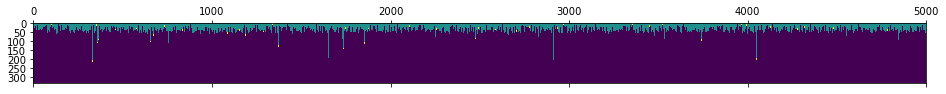

In [19]:
plt.matshow(np.transpose(sepsis_matrix))

## Matrix display 1000 by 1000

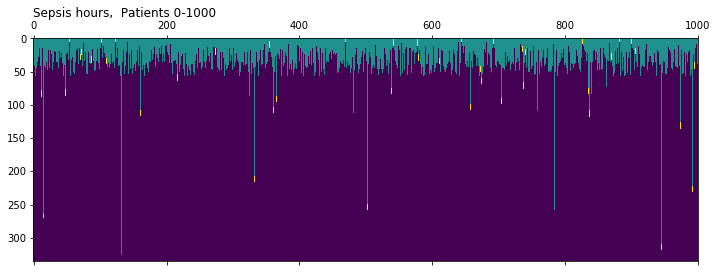

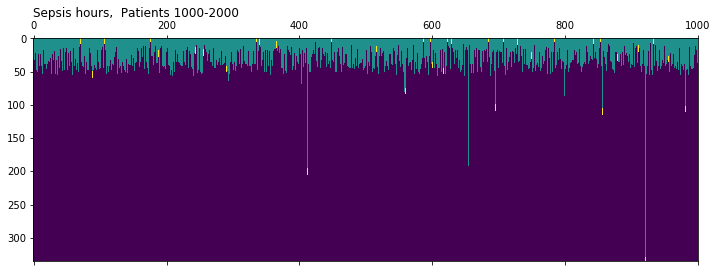

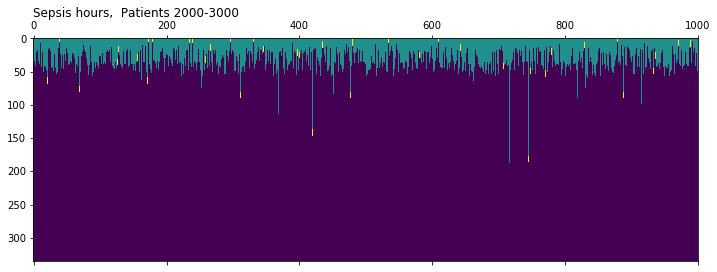

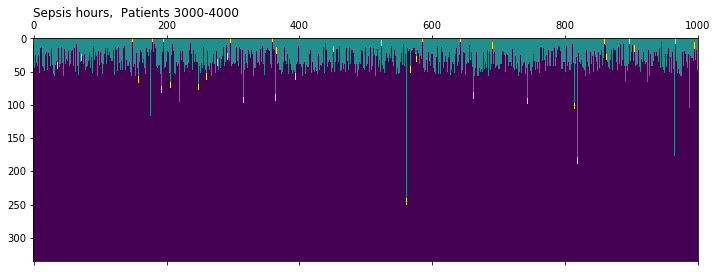

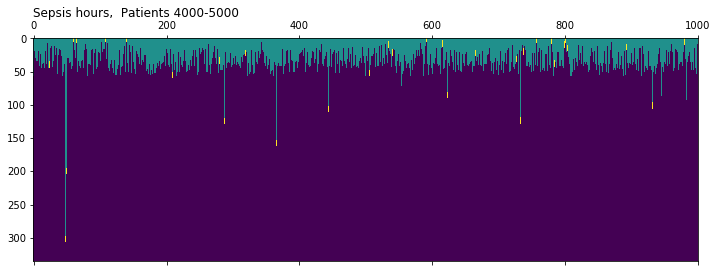

In [20]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')